In [89]:
import pandas as pd
import numpy as np
from haversine import haversine
from pandas import option_context
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def great_circle_distance(p1, p2):
    return haversine(p1, p2, unit='km')

map_plotter = Basemap()

df = pd.read_csv('data/coordinates.csv')
df.head()

,Heading,City,Country code,Latitude,Longitude
0,Zika Outbreak Hits Miami,Miami,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,US,25.79065,-80.13005
3,"Mystery Virus Spreads in Recife, Brazil",Recife,BR,-8.05389,-34.88111
4,Dallas man comes down with case of Zika,Dallas,US,44.91928,-123.31705


In [92]:
df = df[df.Heading.str.contains('Zika|Mad Cow|MDC') == True]
display(df.head(10))

,Heading,City,Country code,Latitude,Longitude
0,Zika Outbreak Hits Miami,Miami,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,US,25.79065,-80.13005
4,Dallas man comes down with case of Zika,Dallas,US,44.91928,-123.31705
5,Trinidad confirms first Zika case,Trinidad,BO,-14.83333,-64.90000
6,Zika Concerns are Spreading in Houston,Houston,US,29.76328,-95.36327
9,Zika Infested Monkeys in Sao Paulo,São Paulo,BR,-23.54750,-46.63611
10,Brownsville teen contracts Zika virus,Brownsville,US,40.66094,-73.92014
11,Mosquito control efforts in St. Louis take new...,St. Louis,US,38.62727,-90.19789
12,San Juan reports 1st U.S. Zika-related death a...,San Juan,AR,-31.53750,-68.53639


In [93]:
us_df = df[df['Country code'] == 'US']
world_df = df[df['Country code'] != 'US']

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


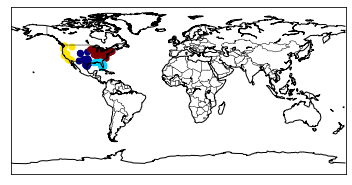

                                            Heading Distance
198                Outbreak of Zika in Stephenville  59.9656
278                   Zika case reported in Abilene  86.0846
597       More Zika patients reported in Fort Worth  148.394
378        Fort Hood Reports its First Zika Patient  165.249
605                  Zika Outbreak in Wichita Falls  179.887
342             More Zika patients reported in Waco  180.435
376                      Zika spreads to Lewisville  189.732
362       More Zika patients reported in Carrollton   194.71
230      Frisco Woman Tests Positive For Zika Virus  209.051
227  Zika-carrying mosquitoes discovered in Ardmore  258.932
218                  Zika Virus Detected in Lubbock  315.063
83              Zika San Antonio Patient Speaks Out  323.656
113  Spring break ruined by Zika in Fort Lauderdale  409.077
6            Zika Concerns are Spreading in Houston  435.701
143              Outbreak of Zika in Corpus Christi  521.149
115         Two more Zik

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [94]:
coordinates = us_df[['Longitude', 'Latitude']]
cluster_model_kmeans = KMeans(n_clusters=4)
predicted_kmeans = cluster_model_kmeans.fit_predict(coordinates)
us_df['cluster'] = predicted_kmeans
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.scatter(coordinates['Longitude'], coordinates['Latitude'], c=predicted_kmeans, latlon=True, cmap=plt.cm.jet)
plt.show()
for cluster_number in range(0, 4):
    cluster = us_df[us_df.cluster == cluster_number]
    mean_lat, mean_lon = np.mean(cluster['Latitude']), np.mean(cluster['Longitude'])
    cluster['Distance'] = None
    for i in cluster.index:
        cluster['Distance'][i] = great_circle_distance((mean_lat, mean_lon), (cluster['Latitude'][i], cluster['Longitude'][i]))
    cluster = cluster.sort_values(by=['Distance'])
    with option_context('display.max_colwidth', 400):
        print(cluster[['Heading', 'Distance']])

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


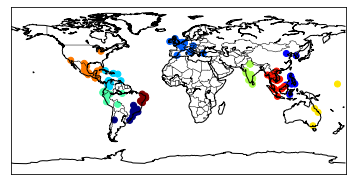

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

                                                        Heading Distance
533                     More Zika patients reported in Botucatu  153.751
42                          Zika outbreak in Piracicaba, Brazil   220.02
9                            Zika Infested Monkeys in Sao Paulo  271.007
171                                      Zika arrives in Santos  295.446
434               More Zika patients reported in Ribeirao Preto  352.567
580                                   Zika Reported in Sao Jose  461.663
159                               Zika Troubles come to Niteroi  639.385
87                    New Zika Case Confirmed in Belo Horizonte  714.534
137                  Zika alert for Rio Grande Valley residents   929.91
60                             Second Zika Paitient in Brasilia  930.891
12   San Juan reports 1st U.S. Zika-related death amid outbreak  2068.04
                                      Heading Distance
95           Zika afflicts patient in Calamba  33.9602
92      Antipo

In [95]:
coordinates = world_df[['Longitude', 'Latitude']]
cluster_model_kmeans = KMeans(n_clusters=10)
predicted_kmeans = cluster_model_kmeans.fit_predict(coordinates)
world_df['cluster'] = predicted_kmeans
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.scatter(coordinates['Longitude'], coordinates['Latitude'], c=predicted_kmeans, latlon=True, cmap=plt.cm.jet)
plt.show()

for cluster_number in range(0, 10):
    cluster = world_df[world_df.cluster == cluster_number]
    mean_lat, mean_lon = np.mean(cluster['Latitude']), np.mean(cluster['Longitude'])
    cluster['Distance'] = None
    for i in cluster.index:
        cluster['Distance'][i] = great_circle_distance((mean_lat, mean_lon), (cluster['Latitude'][i], cluster['Longitude'][i]))
    cluster = cluster.sort_values(by=['Distance'])
    with option_context('display.max_colwidth', 400):
        print(cluster[['Heading', 'Distance']])


In [101]:
print('Zika around the world (India, Southern-Eastern Asia, Australia, Far East, Central and South Americas, US),\n\
Mad Cow Disease in Europe')

Zika around the world (India, Southern-Eastern Asia, Australia, Far East, Central and South Americas, US),
Mad Cow Disease in Europe
